# Credit scoring is a common risk assessment practice in the financial industry. It leverages personal data submitted by credit card applicants to predict potential defaults and assess credit card applications. The bank has the discretion to decide whether an applicant qualifies for a credit card based on this evaluation. Credit scores serve as an objective measure to gauge the level of risk.

# In this dataset, we need a machine learning model to determine whether an applicant falls into the category of 'favorable' or 'unfavorable.' However, the specific criteria for defining 'favorable' or 'unfavorable' are not provided. Furthermore, addressing the challenge of imbalanced data is a significant concern in this project.

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Feature name	Explanation	Remarks of ar dataset

1. ID:	Client number
2. CODE_GENDER:	Gender
3. FLAG_OWN_CAR:	Is there a car
4. FLAG_OWN_REALTY:	Is there a property
5. CNT_CHILDREN:	Number of children
6. AMT_INCOME_TOTAL:	Annual income
7. NAME_INCOME_TYPE:	Income category
8. NAME_EDUCATION_TYPE:	Education level
9. NAME_FAMILY_STATUS:	Marital status
10. NAME_HOUSING_TYPE:	Way of living
11. DAYS_BIRTH:	Birthday	Count backwards from current day (0), -1 means yesterday
12. DAYS_EMPLOYED:	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
13. FLAG_MOBIL:	Is there a mobile phone
14. FLAG_WORK_PHONE:	Is there a work phone
15. FLAG_PHONE:	Is there a phone
16. FLAG_EMAIL:	Is there an email
17. OCCUPATION_TYPE:	Occupation
18. CNT_FAM_MEMBERS:	Family size

## Feature name	Explanation	Remarks of cr dataset

1. ID:	Client number
2. MONTHS_BALANCE:	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
3. STATUS:	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading csv file
ar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Approval Prediction project/application_record.csv')
cr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Approval Prediction project/credit_record.csv')

In [ ]:
# Merge of the tables
df = pd.merge(ar, cr, on='ID', how='inner')
# Dataframe preview
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [ ]:
# Explore de data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
# Let's see some statistics of the DataFrame
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [ ]:
# We change the format of the date columns to years
df['DAYS_BIRTH'] = round((abs(df['DAYS_BIRTH'])/365),2)
df['DAYS_EMPLOYED'] = round((abs(df['DAYS_EMPLOYED'])/365),2)
# We rename the columns
df.rename(columns={"DAYS_BIRTH": "AGE"}, inplace=True)
df.rename(columns={"DAYS_EMPLOYED": "YEARS_EMPLOYED"}, inplace=True)

In [ ]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,44.177938,171.027401,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,11.244663,368.244918,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,20.520000,0.050000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,34.840000,3.450000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,43.180000,7.350000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,53.300000,15.940000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,68.910000,1000.670000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


Text(0.5, 1.0, 'Years employed')

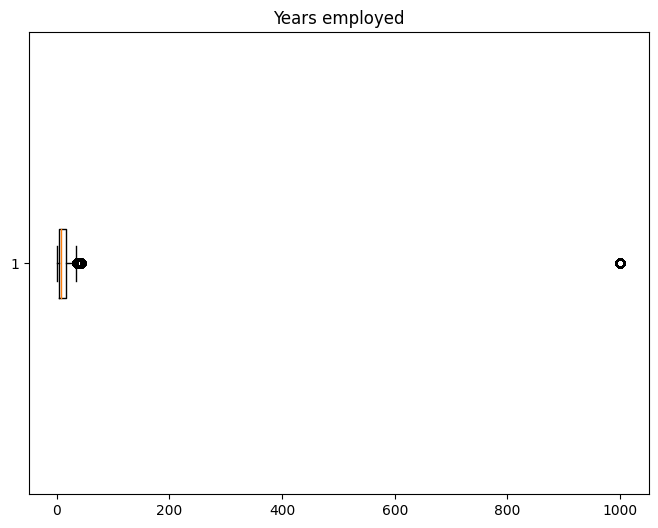

In [ ]:
# There seem to be outliers in the years employed column, let's handle it

# Let's look at it graphically first
plt.figure(figsize=(8, 6))
plt.boxplot(df['YEARS_EMPLOYED'], vert=False)
plt.title("Years employed")
# It is not possible for someone to have been working for 1000 years, poor man

In [ ]:
# Identification of outliers
Q1 = df['YEARS_EMPLOYED'].quantile(0.25)
Q3 = df['YEARS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['YEARS_EMPLOYED'] < lower_bound) | (df['YEARS_EMPLOYED'] > upper_bound)]

In [ ]:
# Elimination of outliers
df = df[(df['YEARS_EMPLOYED'] >= lower_bound) & (df['YEARS_EMPLOYED'] <= upper_bound)]

Text(0.5, 1.0, 'Years employed')

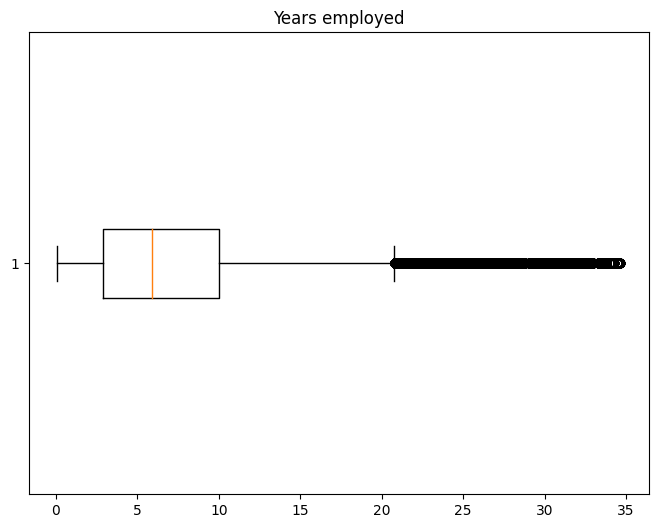

In [ ]:
# Let's see the boxplot again
plt.figure(figsize=(8, 6))
plt.boxplot(df['YEARS_EMPLOYED'], vert=False)
plt.title("Years employed")

<ipython-input-14-6a5aaeb5b998>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.YEARS_EMPLOYED)


<Axes: xlabel='YEARS_EMPLOYED', ylabel='Density'>

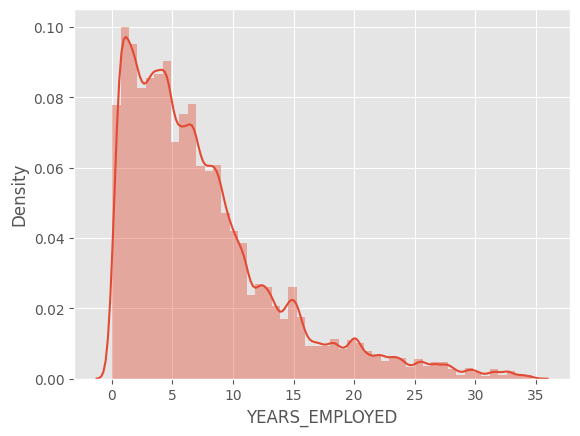

In [ ]:
plt.style.use('ggplot')

sns.distplot(df.YEARS_EMPLOYED)

In [ ]:
# We create a variable called positive status to summarize the status variable where 0, C and X will correspond to 1 and everything else to 0 (negative status)

# We define the function
def encode_status(status):
    if status in ['0', 'C', 'X']:
        return 1
    else:
        return 0

# We apply the function to the STATUS column and create the POSITIVE_STATUS column
df['POSITIVE_STATUS'] = df['STATUS'].apply(encode_status)

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,POSITIVE_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12.44,1,1,0,0,NaN,2.0,0,C,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12.44,1,1,0,0,NaN,2.0,-1,C,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12.44,1,1,0,0,NaN,2.0,-2,C,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12.44,1,1,0,0,NaN,2.0,-3,C,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12.44,1,1,0,0,NaN,2.0,-4,C,1


<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

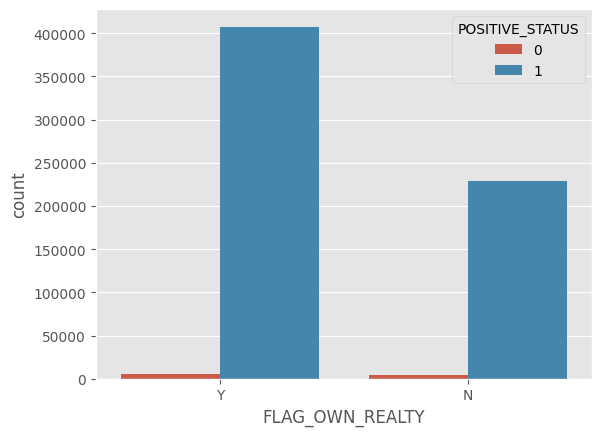

In [ ]:
# Let's see the number of records that have property segmented by the 'POSITIVE_STATUS' column
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='POSITIVE_STATUS')

# We can see the dataset is unbalanced

In [ ]:
# Let's see unique values
df.nunique()

ID                     30201
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         211
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
AGE                     3275
YEARS_EMPLOYED          1862
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
POSITIVE_STATUS            2
dtype: int64

In [ ]:
# We are going to convert categorical variables into dummies
df = pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR',
                                 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                                 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                 'NAME_HOUSING_TYPE'])

In [ ]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
2,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# We eliminate one of the generated columns because the 0 in the first column
# already gives the same information as the other and keeping them would be redundant
redundant_columns = ['CODE_GENDER_F','FLAG_OWN_CAR_N','FLAG_OWN_REALTY_N',
                     'NAME_INCOME_TYPE_Student','NAME_EDUCATION_TYPE_Secondary / secondary special',
                     'NAME_FAMILY_STATUS_Single / not married','NAME_HOUSING_TYPE_With parents']
df = df.drop(redundant_columns, axis=1)
# Example: gender_m = 0 is the same to gender_f = 1

In [ ]:
# We rename the columns
new_names = {
    'CODE_GENDER_M':'GENDER',
    'FLAG_OWN_CAR_Y':'OWN_CAR',
    'FLAG_OWN_REALTY_Y':'OWN_REALTY',
    'NAME_INCOME_TYPE_Commercial associate':'NIT_Commercial_associate',
    'NAME_INCOME_TYPE_Pensioner':'NIT_Pensioner',
    'NAME_INCOME_TYPE_State servant':'NIT_State servant',
    'NAME_INCOME_TYPE_Working':'NIT_Working',
    'NAME_EDUCATION_TYPE_Academic degree':'NET_Academic_degree',
    'NAME_EDUCATION_TYPE_Higher education':'NET_Higher_education',
    'NAME_EDUCATION_TYPE_Incomplete higher':'NET_Incomplete_higher',
    'NAME_EDUCATION_TYPE_Lower secondary':'NET_Lower_secondary',
    'NAME_FAMILY_STATUS_Civil marriage':'NFS_Civil_marriage',
    'NAME_FAMILY_STATUS_Married':'NFS_Married',
    'NAME_FAMILY_STATUS_Separated':'NFS_Separated',
    'NAME_FAMILY_STATUS_Widow':'NFS_Widow',
    'NAME_HOUSING_TYPE_Co-op apartment':'NHS_Co-op_apartment',
    'NAME_HOUSING_TYPE_House / apartment':'NHS_House/apartment',
    'NAME_HOUSING_TYPE_Municipal apartment':'NHS_Municipal_apartment',
    'NAME_HOUSING_TYPE_Office apartment':'NHS_Office_apartment',
    'NAME_HOUSING_TYPE_Rented apartment':'NHS_Rented_apartment'
}
# This in order to clarify the dataset
df = df.rename(columns=new_names)

## All Name income type (NIT) variables = 0 means student
## All Name education type (NET) variables = 0 means Secondary / secondary special
## All Name family status (NFS) variables = 0 means Single / not married
## All Name housing type (NHS) variables = 0 means Living with parents

In [ ]:
# Let's see how the Dataframe turned out
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,...,NET_Lower_secondary,NFS_Civil_marriage,NFS_Married,NFS_Separated,NFS_Widow,NHS_Co-op_apartment,NHS_House/apartment,NHS_Municipal_apartment,NHS_Office_apartment,NHS_Rented_apartment
0,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,1,0,0,0,0,0,0,0,1
1,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,1,0,0,0,0,0,0,0,1
2,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,1,0,0,0,0,0,0,0,1
3,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,1,0,0,0,0,0,0,0,1
4,5008804,0,427500.0,32.89,12.44,1,1,0,0,NaN,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Let's look at the top 5 occupations with the highest average total income where they are labeled as positive status
top_5_occupations = df[df['POSITIVE_STATUS'] == 1].groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().nlargest(5)
print(top_5_occupations)

OCCUPATION_TYPE
Managers         282013.633785
Realty agents    243558.847403
IT staff         227334.065934
Drivers          209232.738780
Accountants      208033.592647
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
# The features we have
df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS',
       'POSITIVE_STATUS', 'GENDER', 'OWN_CAR', 'OWN_REALTY',
       'NIT_Commercial_associate', 'NIT_Pensioner', 'NIT_State servant',
       'NIT_Working', 'NET_Academic_degree', 'NET_Higher_education',
       'NET_Incomplete_higher', 'NET_Lower_secondary', 'NFS_Civil_marriage',
       'NFS_Married', 'NFS_Separated', 'NFS_Widow', 'NHS_Co-op_apartment',
       'NHS_House/apartment', 'NHS_Municipal_apartment',
       'NHS_Office_apartment', 'NHS_Rented_apartment'],
      dtype='object')

In [ ]:
# Count the number of occurrences of each ID in the DataFrame
id_count = df['ID'].value_counts()

# Filter IDs that have more than one occurrence
duplicate_ids = id_count[id_count > 1]

# Show duplicate IDs and the number of occurrences
print(duplicate_ids)

5105936    61
5069051    61
5091644    61
5041979    61
5069216    61
           ..
5137441     2
5035922     2
5096330     2
5035920     2
5135879     2
Name: ID, Length: 29915, dtype: int64


In [ ]:
# We treat records with duplicate IDs, this may help with the unbalance of the dataset
df = df.drop_duplicates(subset='ID', keep='first')

[Text(0.5, 0, 'Has a property'), Text(0, 0.5, 'Frequency')]

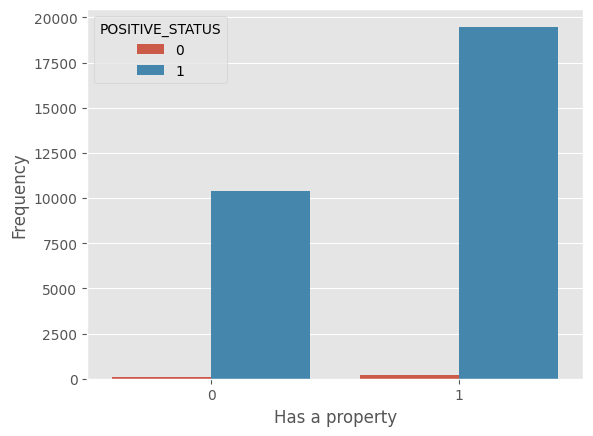

In [ ]:
# Let's see the countplot again
ax = sns.countplot(data=df, x='OWN_REALTY', hue='POSITIVE_STATUS')

ax.set(xlabel='Has a property', ylabel='Frequency')
# It may seem the same, but if you look at the scale the difference has decreased

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Frequency')]

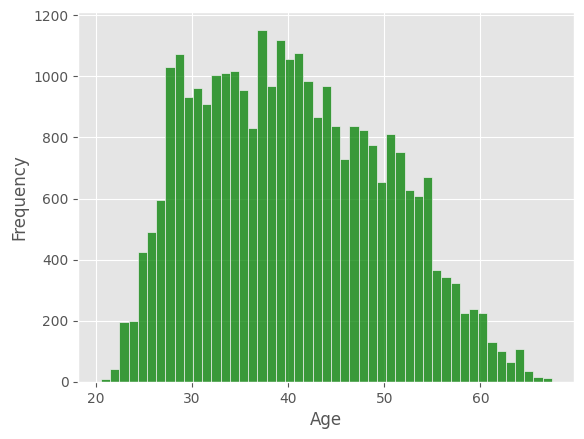

In [ ]:
# Let's see the distribution of age
ax = sns.histplot(data=df, x='AGE', color='g')

ax.set(xlabel='Age', ylabel='Frequency')

[Text(0.5, 0, 'Total Income'), Text(0, 0.5, 'Frequency')]

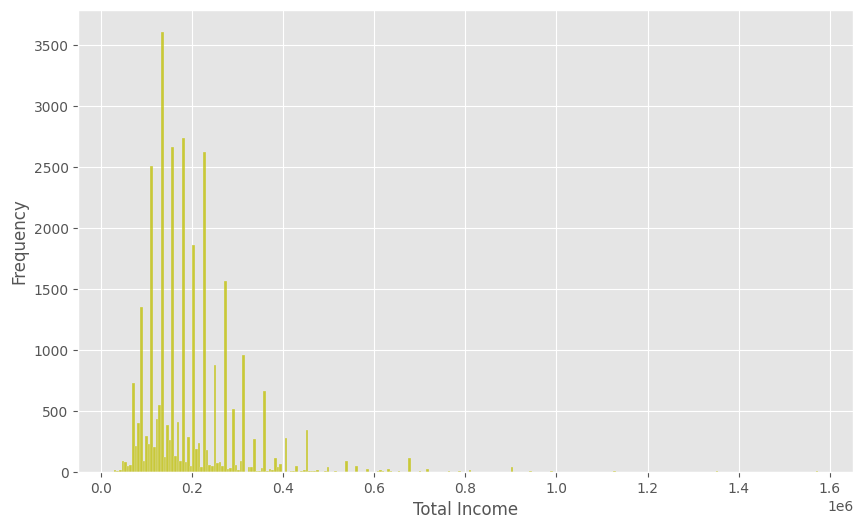

In [ ]:
# Let's see the distribution of total income
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df, x='AMT_INCOME_TOTAL', color='y')

ax.set(xlabel='Total Income', ylabel='Frequency')
# We see that there is a lot of dispersion between total income

[Text(0.5, 0, 'Has a car'), Text(0, 0.5, 'Frequency')]

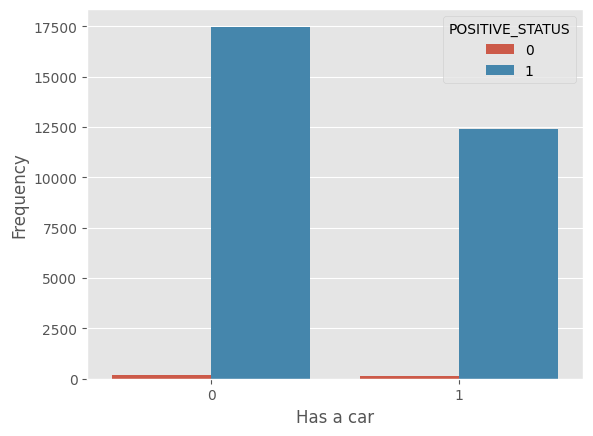

In [ ]:
# Let's see the relationship with own a car
ax = sns.countplot(data=df, x='OWN_CAR', hue='POSITIVE_STATUS')

ax.set(xlabel='Has a car', ylabel='Frequency')

<ipython-input-32-ea83e081b508>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

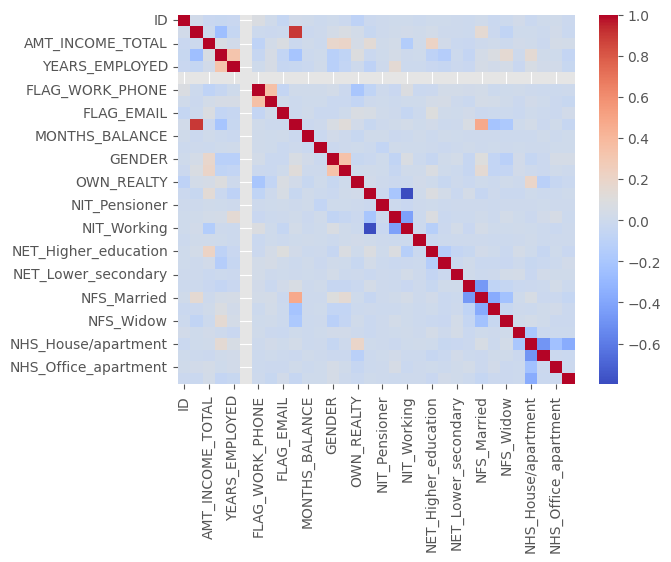

In [ ]:
# With this heat map we can see some correlations between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")

# Let's create a criteria to approve the credit card

In [ ]:
# We define the approval criteria
def approval_criterion(applicant):
    score = 0

    if applicant['AMT_INCOME_TOTAL'] >= df['AMT_INCOME_TOTAL'].mean():
        score += 3

    if applicant['AGE'] >= 25 and applicant['AGE'] <= 60:
        score += 1

    if applicant['YEARS_EMPLOYED'] >= 2:
        score += 1.5

    if applicant['OWN_CAR'] == 1:
        score += 1

    if applicant['OWN_REALTY'] == 1:
        score += 1

    if applicant['FLAG_WORK_PHONE'] == 1:
        score += 1

    if applicant['CNT_CHILDREN'] <= 2:
        score += 1

    if applicant['POSITIVE_STATUS'] == 1:
        score += 5

    # We define a threshold for approval
    approval_threshold = 10

    if score >= approval_threshold:
        return 1
    else:
        return 0

# Apply the criteria to the entire DataFrame and add a new column "approval_threshold"
df['approval_threshold'] = df.apply(approval_criterion, axis=1)

## To define the approval criteria we created a points system, where we gave more weight to having a positive status which means not having unpaid debts, additionally we gave additional weight to having a total income above the average and having more than two years working, characteristics were added such as owning a car or property, the number of children and having an age between 25 and 60 years

[Text(0.5, 0, 'Approval threshold'), Text(0, 0.5, 'Frequency')]

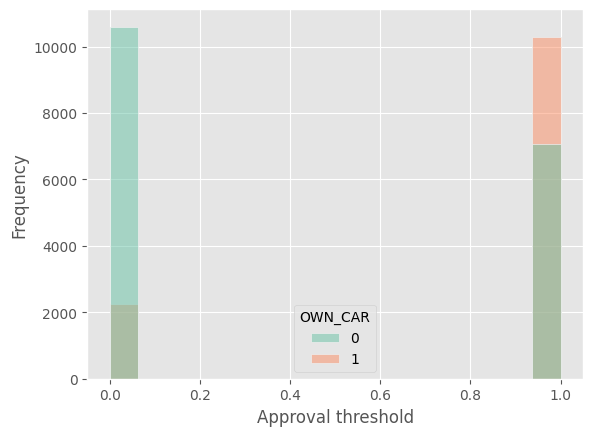

In [ ]:
ax = sns.histplot(data=df,x='approval_threshold',hue='OWN_CAR',
             palette='Set2')

ax.set(xlabel='Approval threshold', ylabel='Frequency')
# It is not enough to just have a car, the most important thing is positive status

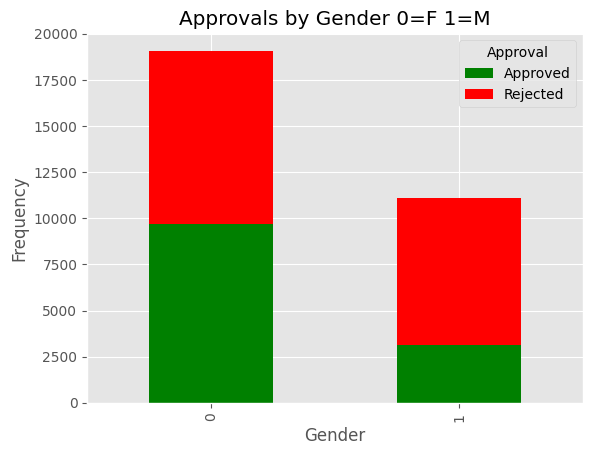

In [ ]:
# We group the data by gender and count the number of approvals and rejections.
gender_approval_counts = df.groupby(['GENDER', 'approval_threshold']).size().unstack()

gender_approval_counts.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Approvals by Gender 0=F 1=M')

plt.legend(title='Approval', labels=['Approved', 'Rejected'])
# There are more approved applications from women, but there are also more female applicants
# This can be interesting for marketing strategies or market segmentation.

Text(0.5, 1.0, 'Violin Approval Threshold Frequency Plot for OWN_REALTY')

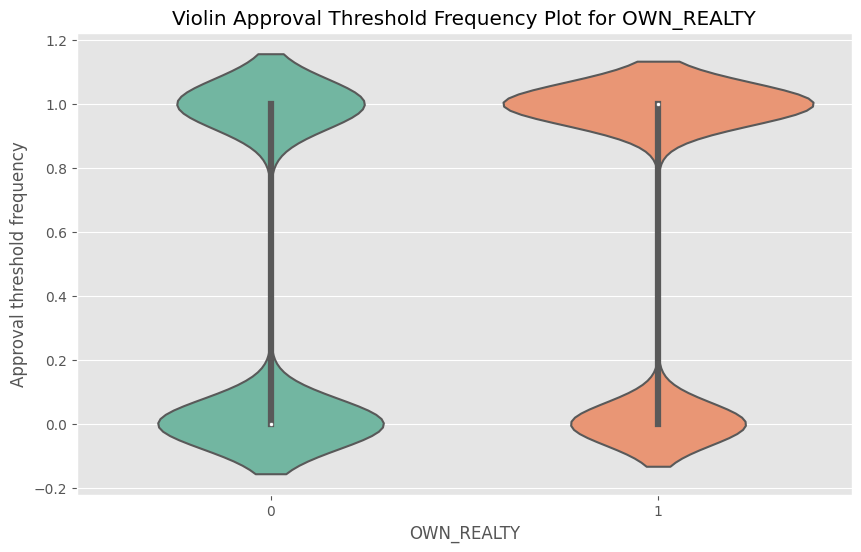

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='OWN_REALTY', y='approval_threshold', data=df, palette='Set2')

plt.xlabel('OWN_REALTY')
plt.ylabel('Approval threshold frequency')
plt.title('Violin Approval Threshold Frequency Plot for OWN_REALTY')
# Again, it is not enough to just have a house, but according to this graph, owning a property implies more approved applications

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

columns_to_drop = ['OCCUPATION_TYPE', 'MONTHS_BALANCE','approval_threshold','STATUS']
X = df.drop(columns_to_drop, axis=1)
y = df['approval_threshold']

# Check the original proportion of the classes
print("Class count before oversampling:", Counter(y))

# Create a pipeline that includes upsampling with SMOTE
pipeline = Pipeline([
    ('SMOTE', SMOTE(sampling_strategy='auto', random_state=42)),
])

# Apply oversampling to your data
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the class ratio after oversampling
print("Class count after oversampling:", Counter(y_resampled))

Class count before oversampling: Counter({1: 17363, 0: 12838})
Class count after oversampling: Counter({1: 17363, 0: 17363})


In [ ]:
from sklearn.model_selection import train_test_split

# We divide the data into training and test sets (e.g. 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# We create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# We create the predictions
predictions = model.predict(X_test)

In [ ]:
# This is the model report with precision, recall and f-score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3545
           1       0.79      0.75      0.77      3401

    accuracy                           0.78      6946
   macro avg       0.78      0.78      0.78      6946
weighted avg       0.78      0.78      0.78      6946



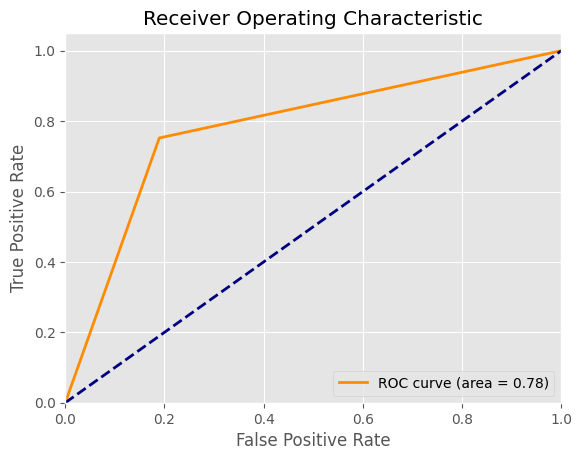

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## The ROC plot illustrates how the true positive rate and false positive rate evolve when adjusting the model's decision threshold. The closer the curve leans towards the top-left corner, the better the model's performance. The AUC offers a quantitative performance metric, where a value approaching 1 signifies superior model performance.

Text(50.722222222222214, 0.5, 'Real value')

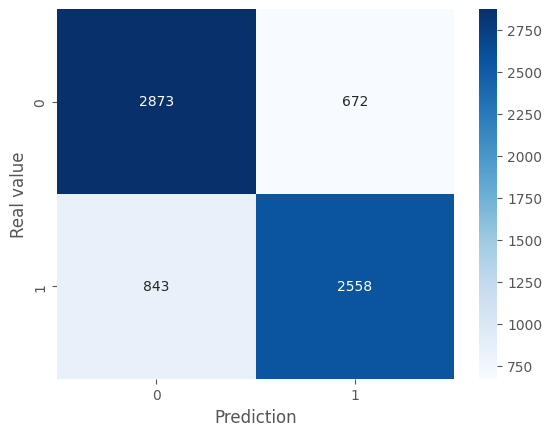

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediction")
plt.ylabel("Real value")

## The details within the confusion matrix are utilized to compute several performance evaluation metrics for the model, including accuracy, sensitivity, specificity, and the F1 value. These metrics provide a deeper insight into the model's classification performance for both positive and negative classes.

# Project conclusions

1. The dataset exhibits a significant imbalance issue, necessitating proper handling for robust statistical inference. When creating the positive status variable, there are notably few instances with this label, representing 'negative status.'

2. Predominantly, female applicants comprise the largest segment of the dataset, resulting in a higher number of approved applications for women. Investigating the root causes behind this gender imbalance could offer insights. It's possible that women make more credit card transactions.

3. There appears to be a correlation between property ownership and credit card approval. Graphical analysis indicates a higher number of approved applications when the applicant is a property owner. This suggests that emphasizing this variable in the scoring system may be beneficial.

4. The credit card approval scoring system mandates a positive status for applicants, alongside other desirable traits that can be tailored to meet specific credit card requirements.

5. A classification model, employing logistic regression, was developed, achieving an impressive f-score of 0.78, indicative of strong performance. Further enhancements could be made by adjusting the approval threshold in alignment with business objectives.